In [12]:
from dist3 import create_task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import display

In [5]:
def dist3_ESBN_task():
    training_set,test_set = create_task()
    # Load images
    all_imgs = []
    n_shapes = 100
    for i in range(n_shapes):
        img_fname = '/home/asw3x/emergent_symbols/imgs/' + str(i) + '.png'
        #img = torch.Tensor(np.array(Image.open(img_fname))) / 255.
        img = np.array(Image.open(img_fname)) #/ 255.
        all_imgs.append(img)
    #all_imgs = torch.stack(all_imgs, 0)
    all_imgs = np.stack(all_imgs,axis=0)
    # Create training and test sets
    train = training_set['seq_ind']
    test = test_set['seq_ind']
    X_train = all_imgs[train,:,:]
    X_test = all_imgs[test,:,:]
    Y_train = training_set['y']
    Y_test = test_set['y']
    
    train_set = {'img_seq': X_train, 'y': Y_train}
    test_set = {'img_seq': X_test, 'y': Y_test}
    return train_set, test_set

In [6]:
training_set,test_set = dist3_ESBN_task()

[2021-05-20 17:26:29,351] n_shapes = 100...
[2021-05-20 17:26:29,352] m_holdout = 0...
[2021-05-20 17:26:29,352] Total possible trials = 5821200...
[2021-05-20 17:26:29,353] Training set size = 10000...
[2021-05-20 17:26:29,353] Test set size = 10000...


In [7]:
training_set['img_seq'].shape

(10000, 9, 32, 32)

In [8]:
training_set['y'].shape

(10000,)

In [10]:
X, y = training_set['img_seq'],training_set['y']

In [15]:
square_img = np.zeros((32,32))
for a in range(32):
    for b in range(32):
        if a == 0 or a == 31 or b == 0 or b == 31:
            square_img[a,b] = 1

In [16]:
square_img.shape

(32, 32)

In [17]:
square_img

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

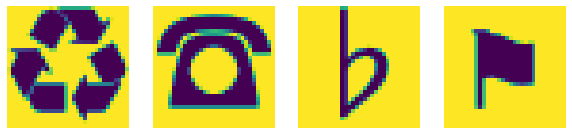

In [40]:
plt.figure(figsize=(10, 10))

for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    #plt.imshow(image.array_to_img(X[i,:,:,:]))
    if i == 5:
        plt.imshow(square_img)
        continue
    plt.imshow(X[0,i,:,:])
    #plt.title("Male, "+img_ids[i] if int(my_labels[i]) == 1 else "Female, "+img_ids[i])
    plt.axis("off")

for i,i2 in zip(range(5,9),range(4)):
    ax1 = plt.subplot(1, 4, i2 + 1)
    #plt.imshow(image.array_to_img(X[i,:,:,:]))
    
    plt.imshow(X[0,i,:,:])
    #plt.title("Male, "+img_ids[i] if int(my_labels[i]) == 1 else "Female, "+img_ids[i])
    plt.axis("off")

plt.savefig("dist3_v1")

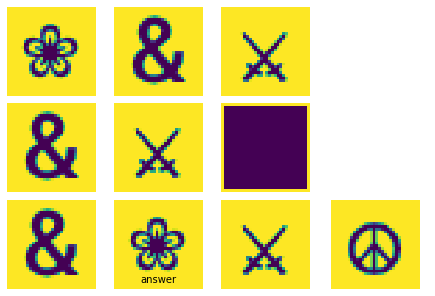

In [66]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(nrows=3, ncols=4)
k = 0
for i in range(2):
    for j in range(3):
        f3_ax1 = fig3.add_subplot(gs[i, j])
        if i == 1 and j == 2:
            f3_ax1.imshow(square_img)
        else:
            f3_ax1.imshow(X[2,k,:,:])
        #plt.title("Male, "+img_ids[i] if int(my_labels[i]) == 1 else "Female, "+img_ids[i])
        plt.axis("off")
        k += 1
k -= 1
for i in range(4):
    f3_ax1 = fig3.add_subplot(gs[2, i])
    f3_ax1.imshow(X[2,k,:,:])
    if i == y[2]:
        f3_ax1.annotate("answer", (0.3, 0.1), xycoords='axes fraction', va='center')
    plt.axis("off")
    k += 1
plt.savefig("dist3_v2")

In [55]:
y[0]

3